In [1]:
#Absenteeism_at_work data set
import pandas as pd
import numpy as np
data=pd.read_excel(r'C:\DataSet\Absenteeism_at_work.xls')
data

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239554,...,0,1,2,1,0,1,90,172,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,11,14,7,3,1,289,36,13,33,264604,...,0,1,2,1,0,1,90,172,30,8
736,1,11,7,3,1,235,11,14,37,264604,...,0,3,1,0,0,1,88,172,29,4
737,4,0,0,3,1,118,14,13,40,271219,...,0,1,1,1,0,8,98,170,34,0
738,8,0,0,4,2,231,35,14,39,271219,...,0,1,2,1,0,2,100,170,35,0


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   ID                               740 non-null    int64
 1   Reason for absence               740 non-null    int64
 2   Month of absence                 740 non-null    int64
 3   Day of the week                  740 non-null    int64
 4   Seasons                          740 non-null    int64
 5   Transportation expense           740 non-null    int64
 6   Distance from Residence to Work  740 non-null    int64
 7   Service time                     740 non-null    int64
 8   Age                              740 non-null    int64
 9   Work load Average/day            740 non-null    int64
 10  Hit target                       740 non-null    int64
 11  Disciplinary failure             740 non-null    int64
 12  Education                        740 non-null    i

In [3]:
data.columns = data.columns.str.replace('/', 'per').str.strip()

In [4]:
data.groupby('ID')[['ID']].count().head()

,ID
ID,
1,23
2,6
3,113
4,1
5,19


In [5]:
data['Social drinker'] = data['Social drinker'].astype('bool')
data['Social smoker'] = data['Social smoker'].astype('bool')
data['Disciplinary failure'] = data['Disciplinary failure'].astype('bool')
data['Seasons'] = data['Seasons'].astype('category')
data['Education'] = data['Education'].astype('category')
data['Day of the week'] = data['Day of the week'].astype('category')
data['Month of absence'] = data['Month of absence'].astype('category')
data['Reason for absence'] = data['Reason for absence'].astype('category')

In [6]:
data.isnull().sum()

ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Averageperday            0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

In [8]:
data[data['Month of absence']==0]

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Averageperday,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
737,4,0,0,3,1,118,14,13,40,271219,...,False,1,1,True,False,8,98,170,34,0
738,8,0,0,4,2,231,35,14,39,271219,...,False,1,2,True,False,2,100,170,35,0
739,35,0,0,6,3,179,45,14,53,271219,...,False,1,1,False,False,1,77,175,25,0


In [9]:
data = data[data['Month of absence'] != 0]

In [10]:
len(data[data['Absenteeism time in hours']==0])

41

In [11]:

len(data[data['Disciplinary failure']==1])

40

In [12]:
data[(data['Absenteeism time in hours']==0) & (data['Disciplinary failure']!=1)]


,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Averageperday,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
134,34,27,1,2,2,118,10,10,37,308593,...,False,1,0,False,False,0,83,172,28,0


In [13]:
data[data['Reason for absence']==27][['Absenteeism time in hours']].mean()

Absenteeism time in hours    2.275362
dtype: float64

In [14]:
data.loc[(data['Reason for absence']==27) & (data['Absenteeism time in hours']==0),'Absenteeism time in hours']=3


C:\Users\605822\Anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [15]:
data.loc[(data['Absenteeism time in hours']==0),'Absenteeism time in hours']=8


In [16]:
len(data[data['Absenteeism time in hours']==0])

0

In [17]:
season_mapping = {1:'Summer', 2:'Autumn', 3:'Winter', 4:'Spring'}
data['season_name'] = data.Seasons.map(season_mapping)
data['season_name'] = data['season_name'].astype('category')
data.drop_duplicates(['Seasons', 'season_name'])[['Seasons','season_name']]

C:\Users\605822\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\605822\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Seasons,season_name
0,1,Summer
49,4,Spring
111,2,Autumn
175,3,Winter


In [20]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics import tsaplots
import statsmodels.api as sm
import seaborn as sns
import numpy as np
import calendar
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import r2_score, mean_squared_error as MSE
from scipy.stats import spearmanr, pearsonr
from sklearn import metrics
from sklearn.metrics import classification_report
from scipy.cluster import hierarchy as hc
import scipy
from collections import Counter

In [21]:
data['month_name'] =  data['Month of absence'].apply(lambda x: calendar.month_abbr[x])

C:\Users\605822\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [23]:
reason_mapping = {
    0: 'Unknown',
    1: 'Certain infectious and parasitic diseases',
    2: 'Neoplasms',
    3: 'Diseases of the blood and blood-forming organs and certain disorders involving the immune mechanism',
    4: 'Endocrine, nutritional and metabolic diseases',
    5: 'Mental and behavioural disorders',
    6: 'Diseases of the nervous system',
    7: 'Diseases of the eye and adnexa',
    8: 'Diseases of the ear and mastoid process',
    9: 'Diseases of the circulatory system',
    10: 'Diseases of the respiratory system',
    11: 'Diseases of the digestive system',
    12: 'Diseases of the skin and subcutaneous tissue',
    13: 'Diseases of the musculoskeletal system and connective tissue',
    14: 'Diseases of the genitourinary system',
    15: 'Pregnancy, childbirth and the puerperium',
    16: 'Certain conditions originating in the perinatal period',
    17: 'Congenital malformations, deformations and chromosomal abnormalities',
    18: 'Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified',
    19: 'Injury, poisoning and certain other consequences of external causes',
    20: 'External causes of morbidity and mortality',
    21: 'Factors influencing health status and contact with health services',
    22: 'Patient follow-up',
    23: 'Medical consultation',
    24: 'Blood donation',
    25: 'Laboratory examination',
    26: 'Unjustified absence',
    27: 'Physiotherapy',
    28: 'Dental consultation'
}
data['reason_text'] = data['Reason for absence'].map(reason_mapping)

C:\Users\605822\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [24]:
education_mapping = {
    1: 'High School',
    2: 'Graduate',
    3: 'Post Graduate',
    4: 'Master & Doctor'
}
education_list = {'High School', 'Graduate', 'Post Graduate', 'Master & Doctor'}
data['Education_detail'] = data['Education'].map(education_mapping)
#data['Education_detail'] = data['Education_detail'].astype('category')
category_education = pd.api.types.CategoricalDtype(categories=education_list, ordered=True)
data['Education_detail'] = data['Education_detail'].astype(category_education)

C:\Users\605822\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\605822\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [25]:
data.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Averageperday,...,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours,season_name,month_name,reason_text,Education_detail
0,11,26,7,3,1,289,36,13,33,239554,...,False,1,90,172,30,4,Summer,Jul,Unjustified absence,High School
1,36,0,7,3,1,118,13,18,50,239554,...,False,0,98,178,31,8,Summer,Jul,Unknown,High School
2,3,23,7,4,1,179,51,18,38,239554,...,False,0,89,170,31,2,Summer,Jul,Medical consultation,High School
3,7,7,7,5,1,279,5,14,39,239554,...,True,0,68,168,24,4,Summer,Jul,Diseases of the eye and adnexa,High School
4,11,23,7,5,1,289,36,13,33,239554,...,False,1,90,172,30,2,Summer,Jul,Medical consultation,High School


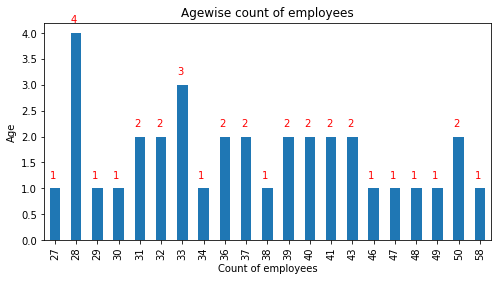

In [27]:
age_count = data.groupby(['Age']).agg({'ID': pd.Series.nunique})
ax = age_count.plot(kind='bar', figsize=(8,4), legend=False)
for i, v in enumerate(age_count.values):
    ax.text(i-.25, v +0.2, str(v[0]), color='red')
ax.set_xlabel('Count of employees')
ax.set_ylabel('Age')
ax.set_title('Agewise count of employees')
plt.show()

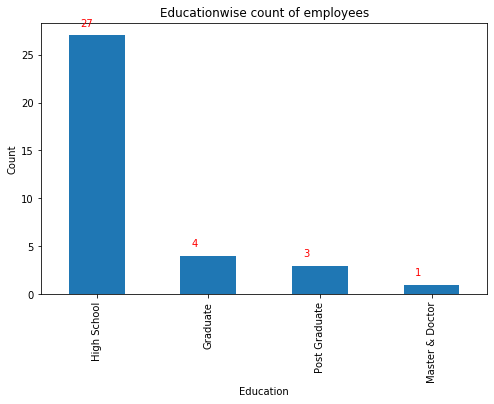

In [29]:
edu_count = data.groupby(['Education_detail']).agg({'ID': pd.Series.nunique})
ax = edu_count.plot(kind='bar', figsize=(8,5), legend=False)
for i, v in enumerate(edu_count.values):
    ax.text(i-.15, v + 1, str(v[0]), color='red')
ax.set_xlabel('Education')
ax.set_ylabel('Count')
ax.set_title('Educationwise count of employees')
plt.show()

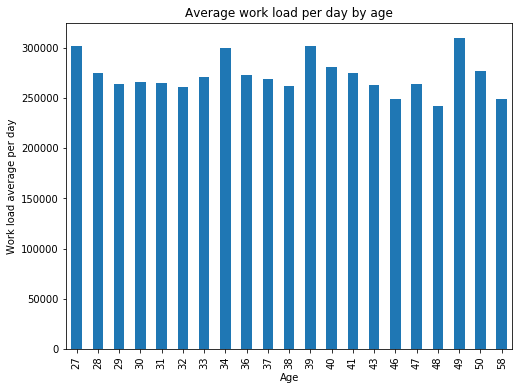

In [35]:
age_work_sum = data.groupby('Age', as_index=False)[['Work load Averageperday']].mean()
ax = age_work_sum.plot(kind='bar', x='Age', figsize=(8,6), legend=False)
ax.set_ylabel('Work load average per day')
ax.set_title('Average work load per day by age')
plt.show()


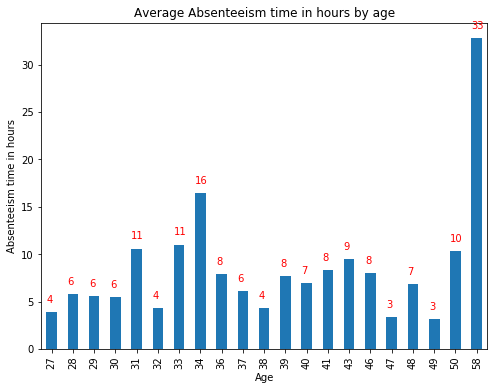

In [36]:
age_abs = data.groupby('Age')[['Absenteeism time in hours']].mean()
ax = age_abs.plot(kind='bar', figsize=(8,6), legend=False)
for i, v in enumerate(age_abs.values):
    ax.text(i-.25, v + 1, str(np.int(np.round(v))), color='red')
ax.set_ylabel('Absenteeism time in hours')
ax.set_title('Average Absenteeism time in hours by age')
plt.show()

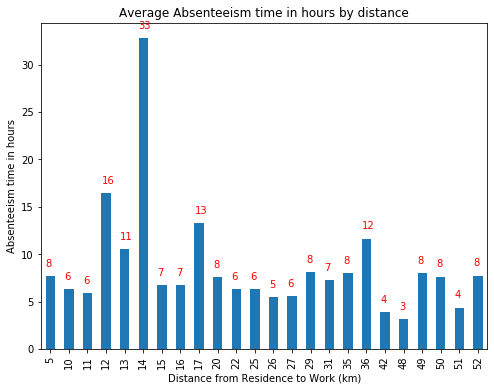

In [37]:
dis_abs = data.groupby('Distance from Residence to Work')[['Absenteeism time in hours']].mean()
ax = dis_abs.plot(kind='bar', figsize=(8,6), legend=False)
for i, v in enumerate(dis_abs.values):
    ax.text(i-.25, v + 1, str(np.int(np.round(v))), color='red')
ax.set_xlabel('Distance from Residence to Work (km)')
ax.set_ylabel('Absenteeism time in hours')
ax.set_title('Average Absenteeism time in hours by distance')
plt.show()

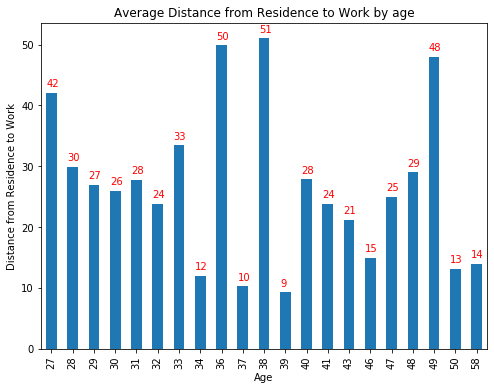

In [38]:
age_dis = data.groupby('Age')[['Distance from Residence to Work']].mean()
ax = age_dis.plot(kind='bar', figsize=(8,6), legend=False)
for i, v in enumerate(age_dis.values):
    ax.text(i-.25, v + 1, str(np.int(np.round(v))), color='red')
ax.set_ylabel('Distance from Residence to Work')
ax.set_title('Average Distance from Residence to Work by age')
plt.show()

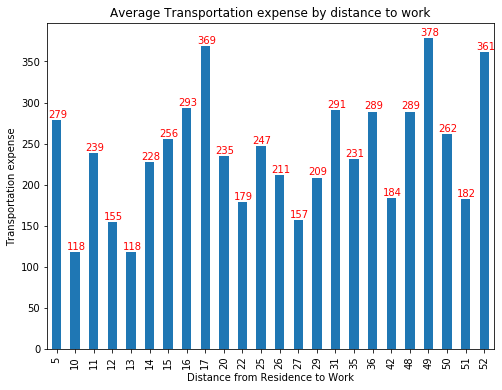

In [39]:
dis_exp = data.groupby('Distance from Residence to Work')[['Transportation expense']].mean()
ax = dis_exp.plot(kind='bar', figsize=(8,6), legend=False)
for i, v in enumerate(dis_exp.values):
    ax.text(i-.45, v + 3, str(np.int(np.round(v))), color='red')
ax.set_ylabel('Transportation expense')
ax.set_title('Average Transportation expense by distance to work')
plt.show()

C:\Users\605822\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


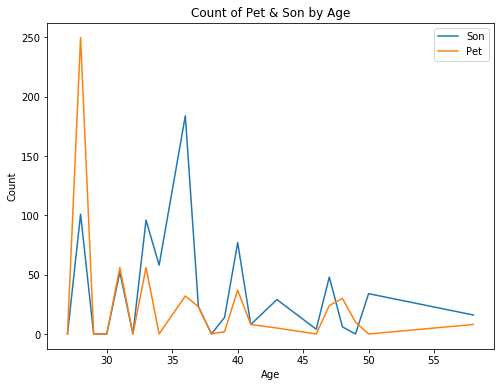

In [40]:
ax = data.groupby('Age')['Son', 'Pet'].sum().plot(figsize=(8,6))
ax.set_ylabel('Count')
ax.set_title('Count of Pet & Son by Age')
plt.show()

In [41]:

emp_social = data.drop_duplicates(['ID', 'Social drinker', 'Social smoker'])[['ID', 'Social drinker', 'Social smoker']]
# % of Social drinker those are smokers
emp_social[emp_social['Social drinker']==True]['Social smoker'].mean()

0.2222222222222222

In [42]:
# % of Social smokers are drinkers
emp_social[emp_social['Social smoker']==True]['Social drinker'].mean()

0.5714285714285714

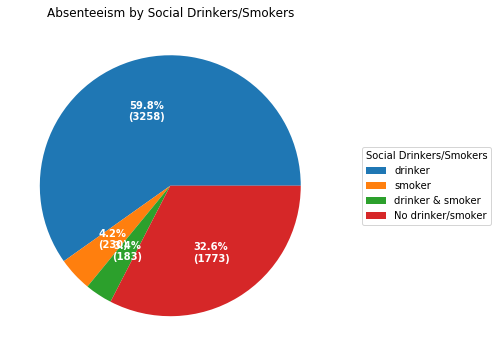

In [43]:
drink_sum = data[(data['Social drinker'] == True) & (data['Social smoker']==False)]['Absenteeism time in hours'].sum()
smok_sum = data[(data['Social drinker'] == False) & (data['Social smoker']==True)]['Absenteeism time in hours'].sum()
drink_smok_sum = data[(data['Social drinker'] == True) & (data['Social smoker']==True)]['Absenteeism time in hours'].sum()
abs_sum = data[(data['Social drinker'] == False) & (data['Social smoker']==False)]['Absenteeism time in hours'].sum()
absen = [drink_sum, smok_sum, drink_smok_sum, abs_sum]
pie_labels = ['drinker', 'smoker', 'drinker & smoker', 'No drinker/smoker']
fig, ax = plt.subplots(figsize=(8, 6), subplot_kw=dict(aspect="equal"))

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)

wedges, texts, autotexts = ax.pie(absen, autopct=lambda pct: func(pct, absen), textprops=dict(color='w'))
ax.legend(wedges, pie_labels, title='Social Drinkers/Smokers', loc='right', bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=10, weight="bold")
ax.set_title('Absenteeism by Social Drinkers/Smokers')
#plt.pie(absen, labels=pie_labels)
plt.show()

In [44]:
reason_abs = data.groupby('reason_text', as_index=False)['Absenteeism time in hours'].sum()
with pd.option_context('display.max_colwidth', -1):
    display(reason_abs.sort_values('Absenteeism time in hours', ascending=False).style.hide_index())


reason_text,Absenteeism time in hours
Diseases of the musculoskeletal system and connective tissue,842
"Injury, poisoning and certain other consequences of external causes",729
Medical consultation,424
Dental consultation,335
Unknown,320
Diseases of the digestive system,297
Patient follow-up,293
Diseases of the respiratory system,276
Unjustified absence,240
"Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified",217


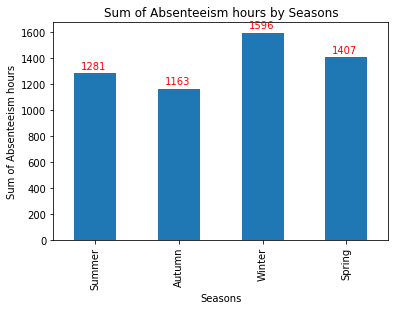

In [45]:
season_abs = data.groupby('season_name')['Absenteeism time in hours'].sum()
ax = season_abs.plot(kind='bar', figsize=(6,4), legend=False)
for i, v in enumerate(season_abs.values):
    ax.text(i-.17, v + 35, str(np.int(np.round(v))), color='red')
ax.set_xlabel('Seasons')
ax.set_ylabel('Sum of Absenteeism hours')
ax.set_title('Sum of Absenteeism hours by Seasons')
plt.show()

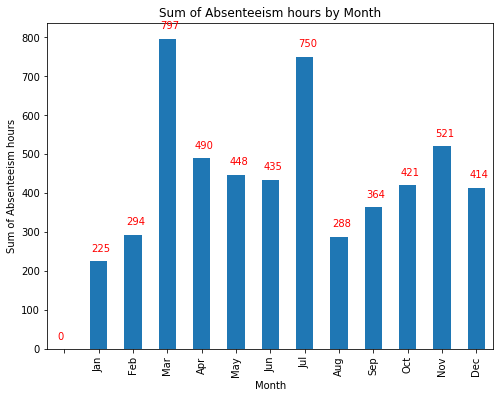

In [46]:
month_abs = data.groupby('month_name')['Absenteeism time in hours'].sum()
ax = month_abs.plot(kind='bar', figsize=(8,6), legend=False)
for i, v in enumerate(month_abs.values):
    ax.text(i-0.2, v + 25, str(np.int(np.round(v))), color='red')
ax.set_xlabel('Month')
ax.set_ylabel('Sum of Absenteeism hours')
ax.set_title('Sum of Absenteeism hours by Month')
plt.show()

In [47]:
mar_abs = data[data['Month of absence']==3].groupby('reason_text', as_index=False)['Absenteeism time in hours'].sum()
with pd.option_context('display.max_colwidth', -1):
    display(mar_abs.sort_values('Absenteeism time in hours', ascending=False).style.hide_index())


reason_text,Absenteeism time in hours
"Injury, poisoning and certain other consequences of external causes",147
Diseases of the musculoskeletal system and connective tissue,136
Diseases of the skin and subcutaneous tissue,112
Diseases of the digestive system,72
Patient follow-up,56
Dental consultation,43
Physiotherapy,41
Diseases of the genitourinary system,33
Unknown,32
Medical consultation,28


In [49]:
jul_abs = data[data['Month of absence']==7].groupby('reason_text', as_index=False)['Absenteeism time in hours'].sum()
with pd.option_context('display.max_colwidth', -1):
    display(jul_abs.sort_values('Absenteeism time in hours', ascending=False).style.hide_index())

reason_text,Absenteeism time in hours
Diseases of the nervous system,128
Diseases of the circulatory system,112
"Injury, poisoning and certain other consequences of external causes",98
Diseases of the musculoskeletal system and connective tissue,88
Patient follow-up,72
Unjustified absence,56
Certain infectious and parasitic diseases,40
Medical consultation,24
Diseases of the digestive system,21
Dental consultation,18


In [50]:
df_features = data[['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons', 'Transportation expense', 
        'Distance from Residence to Work', 'Service time', 'Age', 'Work load Averageperday', 'Hit target',
        'Disciplinary failure', 'Education', 'Son', 'Social drinker', 'Social smoker', 'Pet', 'Weight', 
        'Height', 'Body mass index' ]]

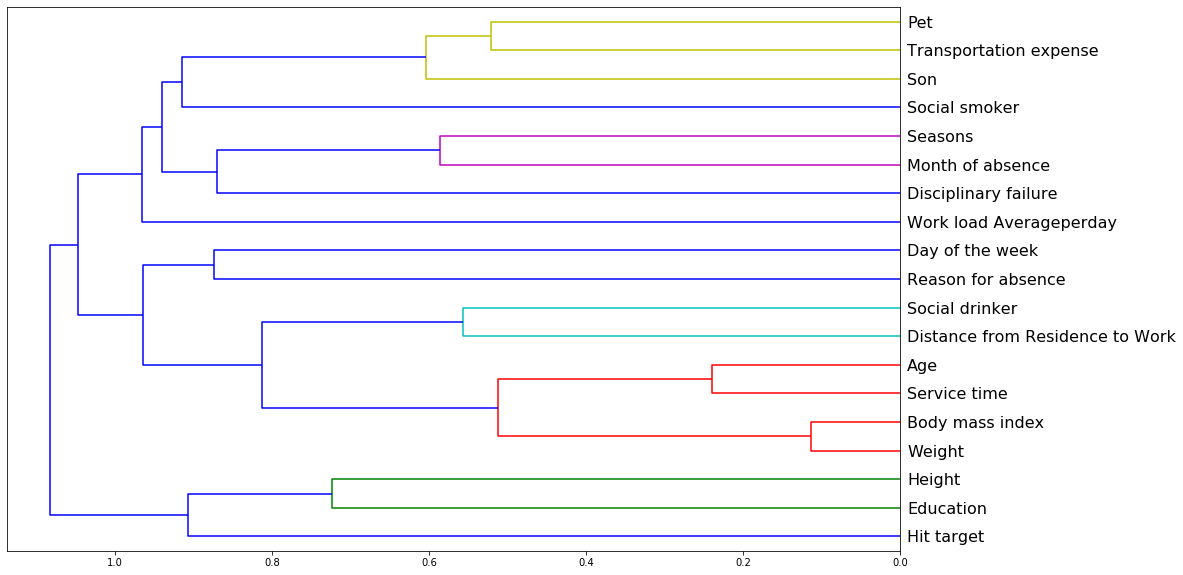

In [51]:
corr = np.round(scipy.stats.spearmanr(df_features).correlation, 4)
corr_condensed = hc.distance.squareform(1-corr)
z = hc.linkage(corr_condensed, method='average')
fig = plt.figure(figsize=(16,10))
dendrogram = hc.dendrogram(z, labels=df_features.columns, orientation='left', leaf_font_size = 16)
plt.show()

In [53]:
X = df_features
y = data['Absenteeism time in hours']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [54]:
model = RandomForestRegressor(n_estimators=1000, random_state=0, oob_score=True, n_jobs=-1)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [55]:
test_score = r2_score(y_test, y_pred)
spearman = spearmanr(y_test, y_pred)
pearson = pearsonr(y_test, y_pred)
rmse_test = MSE(y_test, y_pred) ** (1/2)

print(f'Out-of-bag score : {model.oob_score_:>5.3}')
print(f'Test data R-2 score: {test_score:>5.3}')
print(f'Test set of RMSE : {rmse_test:.2f}')
print(f'Test data Spearman correlation: {spearman[0]:.3}')
print(f'Test data Pearson correlation: {pearson[0]:.3}')

Out-of-bag score : -0.0335
Test data R-2 score: 0.0224
Test set of RMSE : 12.87
Test data Spearman correlation: 0.647
Test data Pearson correlation: 0.302


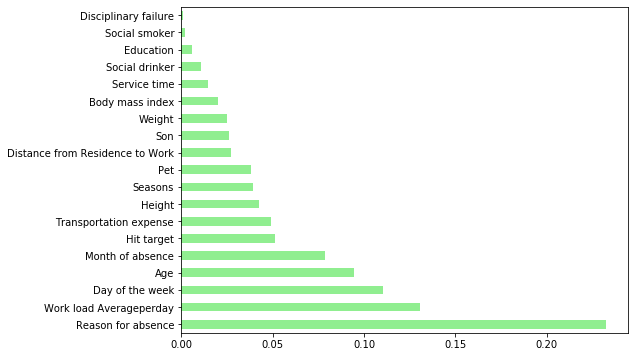

In [56]:
ax = (pd.Series(model.feature_importances_, index=X.columns)
   .nlargest(19)
   .plot(kind='barh', figsize=(8,6), color='lightgreen'))
plt.show()

In [58]:
abs_bins = [0, 4, 8, 16, np.inf]
abs_names = ['<4', '8', '16', '16+']
data['abs_range'] = pd.cut(data['Absenteeism time in hours'], abs_bins, labels=abs_names)

C:\Users\605822\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [59]:
X = df_features
y = data['abs_range']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [60]:
model = RandomForestClassifier(n_estimators=100, random_state=0, oob_score=True, n_jobs=-1)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [61]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7342342342342343


In [62]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          16       0.00      0.00      0.00         3
         16+       0.33      0.18      0.24        11
           8       0.66      0.64      0.65        78
          <4       0.80      0.85      0.83       130

    accuracy                           0.73       222
   macro avg       0.45      0.42      0.43       222
weighted avg       0.72      0.73      0.72       222



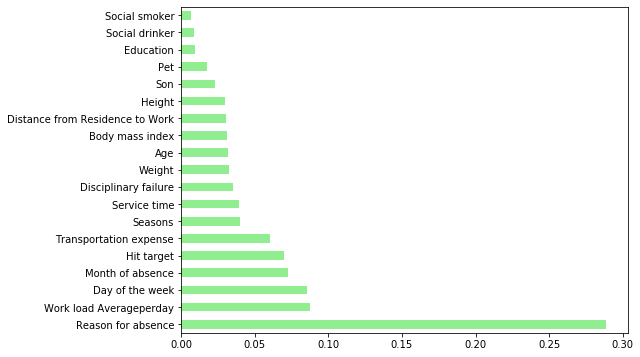

In [63]:
ax = (pd.Series(model.feature_importances_, index=X.columns)
   .nlargest(19)
   .plot(kind='barh', figsize=(8,6), color='lightgreen'))
plt.show()

In [64]:
bins = [25, 35, 45, 55, np.inf]
names = [25, 35, 45, 55]
data['age_range'] = pd.cut(data['Age'], bins, labels=names)

C:\Users\605822\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [65]:
X = data[['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons', 'Transportation expense', 
        'Distance from Residence to Work', 'Service time', 'age_range', 'Work load Averageperday', 'Hit target',
        'Disciplinary failure', 'Education', 'Son', 'Social drinker', 'Social smoker', 'Pet', 'Weight', 
        'Height', 'Body mass index' ]]
y = data['abs_range']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [66]:
model = RandomForestClassifier(n_estimators=100, random_state=0, oob_score=True, n_jobs=-1)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [67]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7432432432432432


In [68]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          16       0.00      0.00      0.00         3
         16+       0.33      0.18      0.24        11
           8       0.68      0.63      0.65        78
          <4       0.80      0.88      0.84       130

    accuracy                           0.74       222
   macro avg       0.45      0.42      0.43       222
weighted avg       0.72      0.74      0.73       222

